In [1]:
# https://news.ycombinator.com/robots.txt
# User-Agent: * 
# Disallow: /x?
# Disallow: /vote?
# Disallow: /reply?
# Disallow: /submitted?
# Disallow: /submitlink?
# Disallow: /threads?
# Crawl-delay: 30

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

# Part 1 Data Aquisition

In [3]:
def getDataList():
    #grab the html page
    html = browser.page_source
    #html pare
    soup = BeautifulSoup(html,'lxml')

    for tag in soup.find_all(class_="athing"):
        rank = tag.find("span",{"class":"rank"}).text
        ranks.append(rank)
        title = tag.find("a",{"class":"storylink"}).text
        titles.append(title)
        titLens.append(len(title))
    for tag in soup.find_all(class_="subtext"):
        try:
            age = tag.find(text=re.compile('hour|minute|day')).text
        except:
            age = tag.find(text=re.compile('hour|minute|day'))
        ages.append(age)
        try:
            point = tag.find("span",{"class":"score"}).text
        except:
            point = tag.find("span",{"class":"score"})
        points.append(point)
        try:
            numCom = tag.find(text=re.compile('comment')).text
        except:
            numCom = tag.find(text=re.compile('comment'))
        numComs.append(numCom)

In [4]:
#target web link
url = "https://news.ycombinator.com"
#use safari open the web
browser = webdriver.Safari()
browser.get(url)

In [5]:
# scrap data list from first 5 page
ranks = []
titles = []
titLens = []
ages = []
points = []
numComs = []
for i in range(0,5):   
    getDataList()
    time.sleep(3)
    # next page
    more = browser.find_element_by_class_name("morelink")
    more.click()
browser.close()

In [6]:
# clear ranks
for i in range(len(ranks)): 
    ranks[i] = ranks[i].replace('.','')
# convert ranks to int   
ranks = list(map(int, ranks))

In [7]:
# clear ages
for i in range(len(ages)): 
    ages[i] = ages[i].replace(' ago','')

In [8]:
# clear points and convert to int
for i in range(len(points)):
    try:
        points[i] = int(re.search(r'\d+', points[i]).group())
    except:
        points[i] = 0

In [9]:
# clear numComs and convert to int
for i in range(len(numComs)): 
    try:
        numComs[i] = numComs[i].replace('\xa0comments','')
        numComs[i] = numComs[i].replace('\xa0comment','')
        numComs[i] = int(re.search(r'\d+', numComs[i]).group())
    except:
        numComs[i] = 0

In [10]:
# creat dataframe and csv file
dataList = list(zip(ranks, titles, titLens, ages, points, numComs))
df = pd.DataFrame(dataList, columns = ['Rank', 'Title', 'TitleLength', 'Age', 'Point', 'NumberOfComment'])
df.to_csv('out.csv')

# Part 2 Regression

In [11]:
# Rank ~ TitleLength model
ad_NL = sm.ols(formula="Rank ~ TitleLength", data=df).fit()
ad_NL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3901
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.533
Time:                        19:18:49   Log-Likelihood:                -777.87
No. Observations:                 150   AIC:                             1560.
Df Residuals:                     148   BIC:                             1566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      68.7979     11.304      6.086      0.000      46.460      91.136
TitleLength     0.1283      0.205      0.625      0.533      -0.278       0.534
==============================================================================
Omnibus:                       55.641   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.735
Skew:                          -0.015   Prob(JB):                       0.0127
Kurtosis:                       1.818   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Rank ~ Point model
ad_NL = sm.ols(formula="Rank ~ Point", data=df).fit()
ad_NL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                  0.008696
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.926
Time:                        19:18:49   Log-Likelihood:                -778.06
No. Observations:                 150   AIC:                             1560.
Df Residuals:                     148   BIC:                             1566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.2357      4.549     16.537      0.000      66.245      84.226
Point          0.0018      0.019      0.093      0.926      -0.036       0.040
==============================================================================
Omnibus:                       61.340   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.012
Skew:                          -0.000   Prob(JB):                       0.0110
Kurtosis:                       1.799   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Rank ~ NumberOfComment model
ad_NL = sm.ols(formula="Rank ~ NumberOfComment", data=df).fit()
ad_NL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2044
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.652
Time:                        19:18:49   Log-Likelihood:                -777.96
No. Observations:                 150   AIC:                             1560.
Df Residuals:                     148   BIC:                             1566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          74.3681      4.349     17.098      0.000      65.773      82.963
NumberOfComment     0.0163      0.036      0.452      0.652      -0.055       0.087
==============================================================================
Omnibus:                       62.941   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.086
Skew:                           0.003   Prob(JB):                       0.0106
Kurtosis:                       1.794   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Rank ~ TitleLength+ Point + NumberOfComment model
ad_NL = sm.ols(formula="Rank ~ TitleLength + Point + NumberOfComment", data=df).fit()
ad_NL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2412
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.868
Time:                        19:18:49   Log-Likelihood:                -777.69
No. Observations:                 150   AIC:                             1563.
Df Residuals:                     146   BIC:                             1575.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          67.9872     11.938      5.695      0.000      44.393      91.582
TitleLength         0.1299      0.207      0.627      0.532      -0.280       0.539
Point              -0.0093      0.029     -0.327      0.745      -0.066       0.047
NumberOfComment     0.0304      0.054      0.565      0.573      -0.076       0.137
==============================================================================
Omnibus:                       58.745   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.889
Skew:                          -0.009   Prob(JB):                       0.0117
Kurtosis:                       1.808   Cond. No.                         874.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# we get lower value in R-squared from all simple linear regression than mutilelinear regression
# and, when we use simple linear regression, TitleLength is the most useful variable.
# however, when we we use mutilelinear regression, NumberOfComment is the most useful variable.
# I don't think there is any linear relationships between any variable. because the highest R-squared we get is 0.010
# and it is too low for a linear relationships

# Part 3 Classification

In [16]:
front = []
for i in range(len(ranks)):
    if ranks[i] <= 30:
        front.append(1)
    else:
        front.append(0)
df['Front'] = front 

In [17]:
# Front ~ TitleLength + Point + NumberOfComment model
front_model = sm.logit(formula="Front ~ TitleLength + Point + NumberOfComment", data=df).fit()
front_model.summary()

Optimization terminated successfully.
         Current function value: 0.495909
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Front   No. Observations:                  150
Model:                          Logit   Df Residuals:                      146
Method:                           MLE   Df Model:                            3
Date:                Wed, 05 Jun 2019   Pseudo R-squ.:                0.008980
Time:                        19:18:49   Log-Likelihood:                -74.386
converged:                       True   LL-Null:                       -75.060
                                        LLR p-value:                    0.7178
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4806      0.689     -2.150      0.032      -2.831      -0.131
TitleLength         0.0042      0.012      0.353      0.724      -0.019       0.027
Point               0.0007      0.002      0.359      0.720      -0.003       0.004
NumberOfComment    -0.0035      0.004     -0.850      0.395      -0.012       0.005
===================================================================================
"""

In [18]:
# Front ~ TitleLength + NumberOfComment model
front_model = sm.logit(formula="Front ~ TitleLength + NumberOfComment", data=df).fit()
front_model.summary()

Optimization terminated successfully.
         Current function value: 0.496336
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Front   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Jun 2019   Pseudo R-squ.:                0.008127
Time:                        19:18:49   Log-Likelihood:                -74.450
converged:                       True   LL-Null:                       -75.060
                                        LLR p-value:                    0.5434
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4475      0.683     -2.119      0.034      -2.786      -0.109
TitleLength         0.0040      0.012      0.341      0.733      -0.019       0.027
NumberOfComment    -0.0024      0.003     -0.964      0.335      -0.007       0.002
===================================================================================
"""

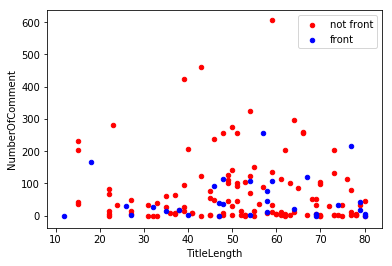

In [19]:
ax = df[df['Front']==0].plot.scatter(x='TitleLength',y='NumberOfComment',color='red',label='not front')
df[df['Front']==1].plot.scatter(x='TitleLength',y='NumberOfComment',color='blue',label='front', ax=ax)

plt.xlabel('TitleLength')
plt.ylabel('NumberOfComment')
plt.show()

In [ ]:
# from the graf you can see that any article have more than 300 comments, it will not show in the front
# and you can see that TitleLength doesn't have a strong relationship with if the article in front or not